In [1]:
#SWIM nadir data visualization notebook
#:author: C. Tourain
#:creation date : 08-11-2019

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################

from math import pi
import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

############################################################# arguments initilization :##########################################################
#SWIM L2 NetCDF file full path
SWIM_L2_NC_file_path='/home/qt/tourainc/pour_hand_book/'
#SWIM L2 NetCDF file full name
#SWIM_L2_NC_file_name='CFO_TEST_SWI_L2ANAD_F_20200404T234349_20200405T011700.nc'
SWIM_L2_NC_file_name='CFO_OPER_SWI_L2_____F_20200404T234349_20200405T011700.nc'

# rate of parameter to visualize : 0:native ; 1:1Hz ; 2:nsec ; 3:box
param_rate = 2

# filtering on validity flag : 0: no filtering; 1: filtering
val_filter= 1

#########comparison to ECMWF data
# comparison activation : 0: inhibited 1 : activated
ecmwf_comp = 1

#if comparison to ecmwf is activated (ecmwf_comp =1) following information have to be updated consistently with L2 filesinformations
#SWIM AUX_METEO NetCDF file full path
SWIM_AUX_MET_NC_file_path='/home/qt/tourainc/valid_sig0_wind_RMA/'
#SWIM AUX_METEO NetCDF file full name
SWIM_AUX_MET_NC_file_name='CFO_OPER_AUX_METEO__F_20200404T234349_20200405T011700.nc'

####################################################### parameters values initialization #############################################

#SWIM_L2 nadir data
cdf=netcdf.Dataset(SWIM_L2_NC_file_path+SWIM_L2_NC_file_name)

# Plot the nadir point for all boxes along the satellite track (Black points)
# plot the selected box localization (red point)
if param_rate==0:
    lat = cdf.variables['lat_l2anad_0'][:]
    lon = cdf.variables['lon_l2anad_0'][:]
    time= cdf.variables['time_nadir_native'][:]
    swh = cdf.variables['nadir_swh_native'][:] 
    sigma0 = cdf.variables['nadir_sigma0_native'][:]
    wind = cdf.variables['nadir_wind_native'][:]
    val_swh=cdf.variables['nadir_swh_native_validity'][:]
    val_sig=cdf.variables['nadir_sigma0_native_validity'][:]
    val_ws=cdf.variables['flag_valid_wind_native'][:]
    ind_swh=np.where(val_swh==0)[0]
    x_swh=list(ind_swh)
    ind_sig=np.where(val_sig==0)[0]
    x_sig=list(ind_sig)
    ind_ws=np.where(val_ws==0)[0]
    x_ws=list(ind_ws)
    rate='native'

if param_rate==1:
    lat = cdf.variables['lat_nadir_1Hz'][:]
    lon = cdf.variables['lon_nadir_1Hz'][:]
    time= cdf.variables['time_nadir_1Hz'][:]
    swh = cdf.variables['nadir_swh_1Hz'][:] 
    sigma0 = cdf.variables['nadir_sigma0_1Hz'][:]
    wind = cdf.variables['nadir_wind_1Hz'][:]
    val_swh=cdf.variables['flag_valid_swh_1Hz'][:]
    val_sig=cdf.variables['flag_valid_sigma0_1Hz'][:]
    val_ws=cdf.variables['flag_valid_wind_1Hz'][:]
    ind_swh=np.where(val_swh==0)[0]
    x_swh=list(ind_swh)
    ind_sig=np.where(val_sig==0)[0]
    x_sig=list(ind_sig)
    ind_ws=np.where(val_ws==0)[0]
    x_ws=list(ind_ws)
    rate='1Hz'

if param_rate==2:
    lat = cdf.variables['lat_l2anad_0'][:]
    lon = cdf.variables['lon_l2anad_0'][:]
    time= cdf.variables['time_nadir_native'][:]
    swh = cdf.variables['nadir_swh_nsec'][:] 
    sigma0 = cdf.variables['nadir_sigma0_nsec'][:]
    wind = cdf.variables['nadir_wind_nsec'][:]
    val_swh=cdf.variables['flag_valid_swh_nsec'][:]
    val_sig=cdf.variables['flag_valid_sigma0_nsec'][:]
    val_ws=cdf.variables['flag_valid_wind_nsec'][:]
    ind_swh=np.where(val_swh==0)[0]
    x_swh=list(ind_swh)
    ind_sig=np.where(val_sig==0)[0]
    x_sig=list(ind_sig)
    ind_ws=np.where(val_ws==0)[0]
    x_ws=list(ind_ws)
    rate='nsec (4.5s)'

if param_rate==3:
    lat = cdf.variables['lat_nadir_l2'][:]
    lon = cdf.variables['lon_nadir_l2'][:]
    time= cdf.variables['time_nadir_l2'][:]
    swh = cdf.variables['nadir_swh_box'][:] 
    sigma0 = cdf.variables['nadir_sigma0_box'][:]
    wind = cdf.variables['nadir_wind_box'][:]
    val_swh=cdf.variables['flag_valid_swh_box'][:]
    val_sig=cdf.variables['flag_valid_sigma0_box'][:]
    val_ws=cdf.variables['flag_valid_wind_box'][:]
    ind_swh=np.where(val_swh==0)[0]
    x_swh=list(ind_swh)
    ind_sig=np.where(val_sig==0)[0]
    x_sig=list(ind_sig)
    ind_ws=np.where(val_ws==0)[0]
    x_ws=list(ind_ws)
    rate='box'


#SWIM_AUX_METEO  data
if ecmwf_comp == 1:
    cdf=netcdf.Dataset(SWIM_AUX_MET_NC_file_path+SWIM_AUX_MET_NC_file_name)    
    ecmwf_swh= cdf.variables['swh'][:,0]
    ecmwf_u10=cdf.variables['u10'][:,0]
    ecmwf_v10=cdf.variables['v10'][:,0]
    ecmwf_ws=np.sqrt((ecmwf_u10*ecmwf_u10) + (ecmwf_v10*ecmwf_v10))

KeyError: 'flag_valid_wind_nsec'

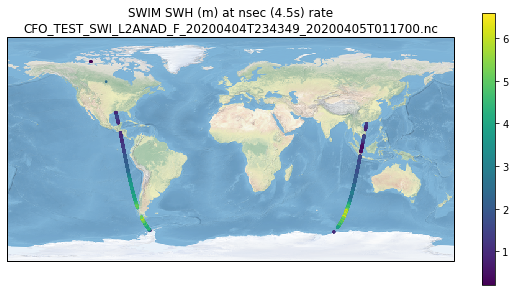

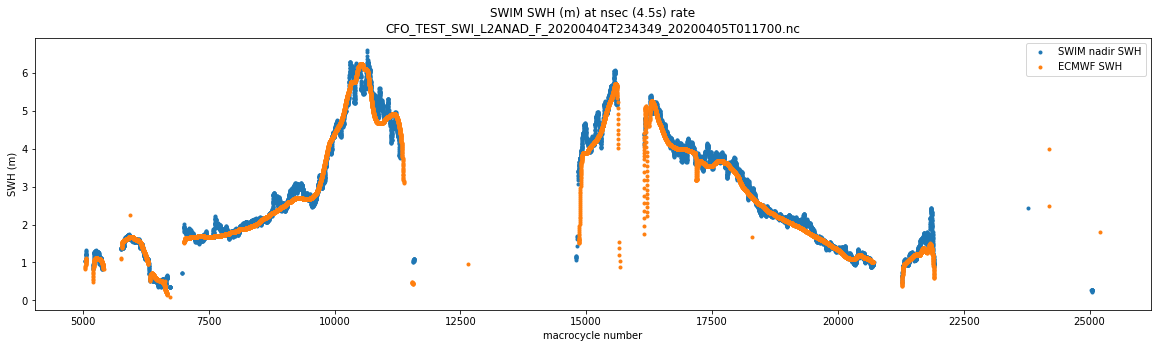

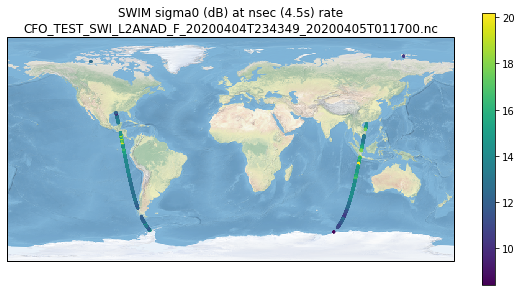

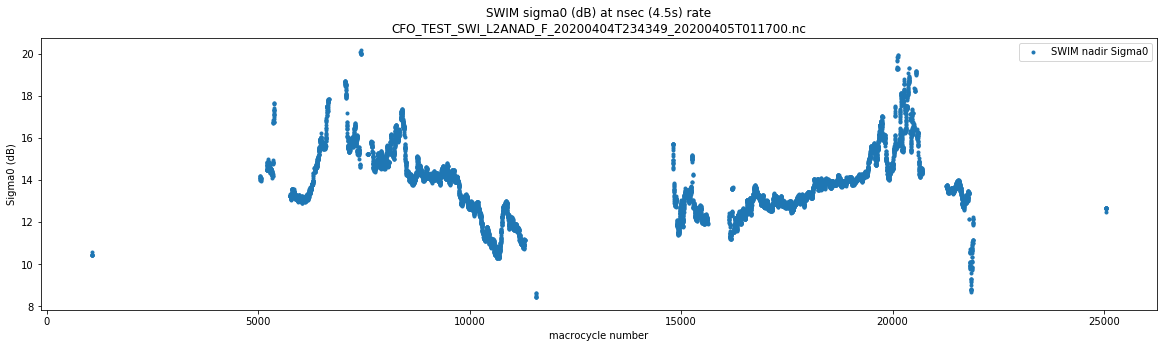

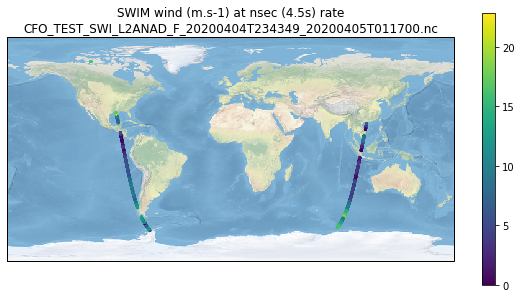

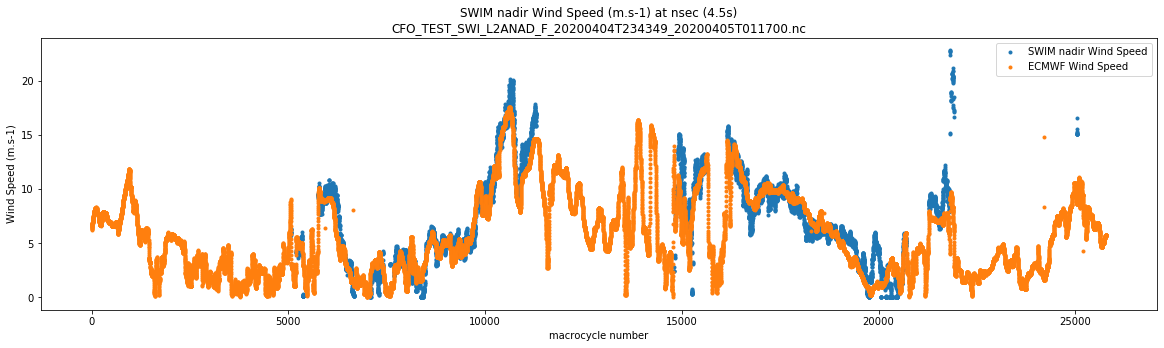

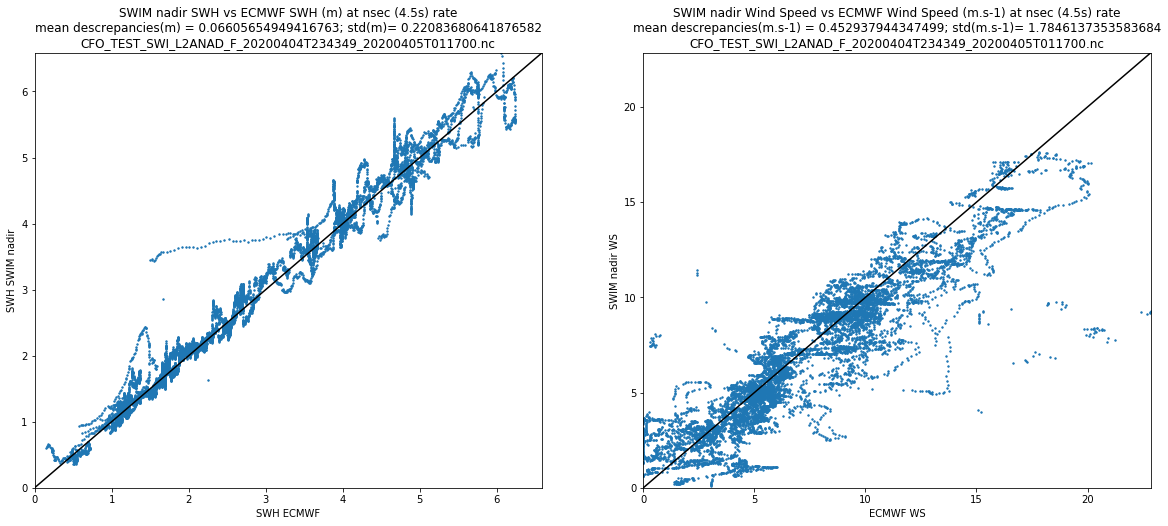

In [26]:
####################################################### SWH  visualization #############################################
fig, ax = plt.subplots(figsize=(10,5))
ax=plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global() 
if val_filter==1:  
    swh_min=np.min(swh[ind_swh])
    swh_max=np.max(swh[ind_swh])
    im=ax.scatter(lon[ind_swh], lat[ind_swh],s=3, c=swh[ind_swh], vmin=swh_min, vmax=swh_max)
else :
    swh_min=np.min(swh)
    swh_max=np.max(swh)
    im=ax.scatter(lon, lat,s=3, c=swh, vmin=swh_min, vmax=swh_max) 
fig.colorbar(im,ax=ax,orientation='vertical')
plt.title('SWIM SWH (m) at '+str(rate)+' rate'+'\n'+str(SWIM_L2_NC_file_name))


fig, ax = plt.subplots(figsize=(20, 5))
if val_filter==1: 
    ax=plt.plot(x_swh,swh[ind_swh],'.',label='SWIM nadir SWH')
else :
    ax=plt.plot(swh,'.',label='SWIM nadir SWH')

if param_rate == 0 or param_rate == 2 and ecmwf_comp==1 :  
    ax=plt.plot(ecmwf_swh,'.',label='ECMWF SWH')
plt.title('SWIM SWH (m) at '+str(rate)+' rate'+'\n'+str(SWIM_L2_NC_file_name))
plt.xlabel('macrocycle number')
plt.ylabel('SWH (m)')
plt.legend()

####################################################### Sigma0  visualization #############################################
fig, ax = plt.subplots(figsize=(10, 5))

ax=plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global() 
if val_filter==1: 
    sig_min=np.min(sigma0[ind_sig])
    sig_max=np.max(sigma0[ind_sig])
    im=ax.scatter(lon[ind_sig], lat[ind_sig],s=3, c=sigma0[ind_sig], vmin=sig_min, vmax=sig_max) 
else : 
    sig_min=np.min(sigma0)
    sig_max=np.max(sigma0)
    im=ax.scatter(lon, lat,s=3, c=sigma0, vmin=sig_min, vmax=sig_max) 
fig.colorbar(im,ax=ax,orientation='vertical')
plt.title('SWIM sigma0 (dB) at '+str(rate)+' rate'+'\n'+str(SWIM_L2_NC_file_name))


fig, ax = plt.subplots(figsize=(20, 5))
if val_filter==1: 
    ax=plt.plot(x_sig,sigma0[ind_sig],'.',label='SWIM nadir Sigma0')
else :
    ax=plt.plot(sigma0)
plt.xlabel('macrocycle number')
plt.ylabel('Sigma0 (dB)')
plt.title('SWIM sigma0 (dB) at '+str(rate)+' rate'+'\n'+str(SWIM_L2_NC_file_name))
plt.legend()


####################################################### wind  visualization #############################################
fig, ax = plt.subplots(figsize=(10, 5))
ax=plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global() 
if val_filter==1: 
    ws_min=np.min(wind[ind_ws])
    ws_max=np.max(wind[ind_ws])
    im=ax.scatter(lon[ind_ws], lat[ind_ws],s=3, c=wind[ind_ws], vmin=ws_min, vmax=ws_max) 
else : 
    ws_min=np.min(wind)
    ws_max=np.max(wind)
    im=ax.scatter(lon, lat,s=3, c=wind, vmin=ws_min, vmax=ws_max) 
fig.colorbar(im,ax=ax,orientation='vertical')
plt.title('SWIM wind (m.s-1) at '+str(rate)+' rate'+'\n'+str(SWIM_L2_NC_file_name))

fig, ax = plt.subplots(figsize=(20, 5))
if val_filter==1: 
    ax=plt.plot(x_ws,wind[ind_ws],'.',label='SWIM nadir Wind Speed')
else :
    ax=plt.plot(wind,'.',label='SWIM nadir Wind Speed')

if param_rate == 0 or param_rate == 2 and ecmwf_comp==1 :  
    ax=plt.plot(ecmwf_ws,'.',label='ECMWF Wind Speed')
plt.title('SWIM nadir Wind Speed (m.s-1) at '+str(rate)+'\n'+str(SWIM_L2_NC_file_name))
plt.xlabel('macrocycle number')
plt.ylabel('Wind Speed (m.s-1)')
plt.legend()

if param_rate == 0 or param_rate == 2 and ecmwf_comp==1:
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.scatter(ecmwf_swh[ind_swh],swh[ind_swh],s= 2)
    plt.plot([0,50],[0,50],color='black')
    plt.xlabel('SWH ECMWF')
    plt.ylabel('SWH SWIM nadir')
    plt.title('SWIM nadir SWH vs ECMWF SWH (m) at '+str(rate)+' rate'+ '\n'+'mean descrepancies(m) = '+ str(np.mean(swh[ind_swh]-ecmwf_swh[ind_swh]))+ '; std(m)= '+ str(np.std(swh[ind_swh]-ecmwf_swh[ind_swh]))+'\n'+str(SWIM_L2_NC_file_name))
    plt.ylim(0,max(np.max(ecmwf_swh[ind_swh]),np.max(swh[ind_swh])))
    plt.xlim(0,max(np.max(ecmwf_swh[ind_swh]),np.max(swh[ind_swh])))
    plt.subplot(1,2,2)
    plt.scatter(wind[ind_ws],ecmwf_ws[ind_ws],s=2)
    plt.plot([0,50],[0,50],color='black')
    plt.xlabel('ECMWF WS')
    plt.ylabel('SWIM nadir WS')
    plt.title('SWIM nadir Wind Speed vs ECMWF Wind Speed (m.s-1) at '+str(rate)+' rate'+'\n'+ 'mean descrepancies(m.s-1) = '+ str(np.mean(wind[ind_ws]-ecmwf_ws[ind_ws]))+ '; std(m.s-1)= '+ str(np.std(wind[ind_ws]-ecmwf_ws[ind_ws]))+'\n'+str(SWIM_L2_NC_file_name))
    plt.ylim(0,max(np.max(ecmwf_ws[ind_ws]),np.max(wind[ind_ws])))
    plt.xlim(0,max(np.max(ecmwf_ws[ind_ws]),np.max(wind[ind_ws])))
    
